# " On my honor, as a student, I have neither given nor received unauthorized aid on this academic work." 

In [ ]:
!pip install seaborn

In [3]:
# Import python packages
import pandas as pd
import csv
import numpy as np
import matplotlib as plt
%matplotlib inline
import requests
from lxml import html
import matplotlib as mpl
import matplotlib.pyplot as plt


In [16]:
#Read the data
df = pd.read_csv("data/bank.csv")
# Find data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
CHK_ACCT            1000 non-null int64
DURATION            1000 non-null int64
HISTORY             1000 non-null int64
NEW_CAR             1000 non-null int64
USED_CAR            1000 non-null int64
FURNITURE           1000 non-null int64
RADIO/TV            1000 non-null int64
EDUCATION           1000 non-null int64
RETRAINING          1000 non-null int64
AMOUNT              1000 non-null int64
SAV_ACCT            1000 non-null int64
EMPLOYMENT          1000 non-null int64
INSTALL_RATE        1000 non-null int64
MALE_DIV            1000 non-null int64
MALE_SINGLE         1000 non-null int64
MALE_MAR_or_WID     1000 non-null int64
CO-APPLICANT        1000 non-null int64
GUARANTOR           1000 non-null int64
PRESENT_RESIDENT    1000 non-null int64
REAL_ESTATE         1000 non-null int64
PROP_UNKN_NONE      1000 non-null int64
AGE                 1000 non-null int64
OTHER_INSTALL 

In [17]:
df.head(10)

,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,AMOUNT,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
0,0,6,4,0,0,0,1,0,0,1169,...,67,0,0,1,2,2,1,1,0,1
1,1,48,2,0,0,0,1,0,0,5951,...,22,0,0,1,1,2,1,0,0,0
2,3,12,4,0,0,0,0,1,0,2096,...,49,0,0,1,1,1,2,0,0,1
3,0,42,2,0,0,1,0,0,0,7882,...,45,0,0,0,1,2,2,0,0,1
4,0,24,3,1,0,0,0,0,0,4870,...,53,0,0,0,2,2,2,0,0,0
5,3,36,2,0,0,0,0,1,0,9055,...,35,0,0,0,1,1,2,1,0,1
6,3,24,2,0,0,1,0,0,0,2835,...,53,0,0,1,1,2,1,0,0,1
7,1,36,2,0,1,0,0,0,0,6948,...,35,0,1,0,1,3,1,1,0,1
8,3,12,2,0,0,0,1,0,0,3059,...,61,0,0,1,1,1,1,0,0,1
9,1,30,4,1,0,0,0,0,0,5234,...,28,0,0,1,2,3,1,0,0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11bf392d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11d032710>]], dtype=object)

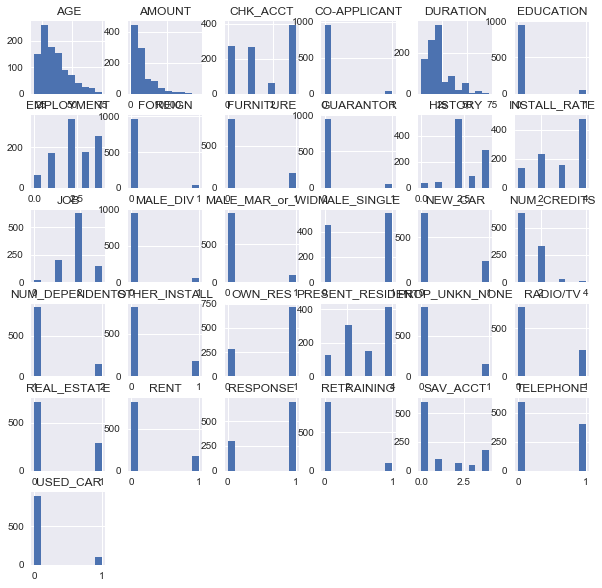

In [18]:
# Histograms
df.hist(figsize=(10,10))

# 1. The three variables would imfluence the Response

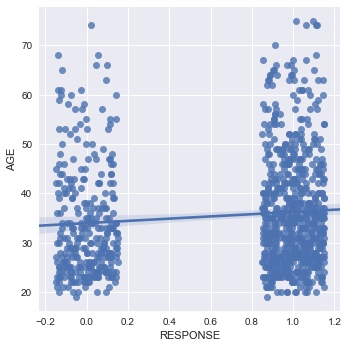

In [19]:
# The age will influence the response. 
import seaborn as sns
sns.lmplot("RESPONSE", "AGE", df, x_jitter=.15)


- A lightly positive relationship between RESPONSE AND AGE

RESPONSE
0    Axes(0.125,0.125;0.775x0.755)
1    Axes(0.125,0.125;0.775x0.755)
Name: DURATION, dtype: object

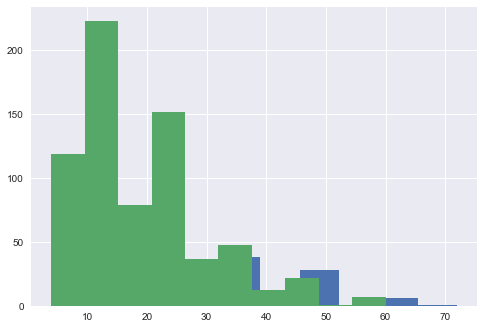

In [20]:
# overloaping by RESPONSE AND DURATION
df.groupby('RESPONSE').DURATION.hist(alpha=0.9)

- The more duration months, the more likely the borrowers don't pay back the loans

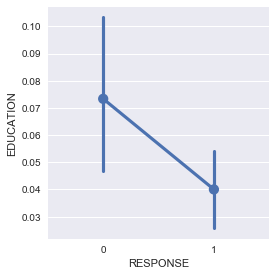

In [21]:
# education influence the response. The higher eduction, the more choose no for response.
sns.factorplot("RESPONSE", "EDUCATION", data=df)

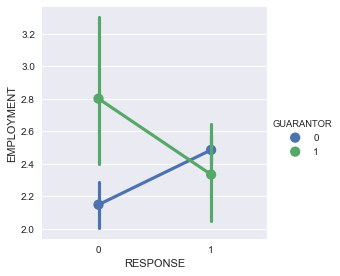

In [22]:
# factorplot for RESPONSE, EMPLOYMENT, GUARANTOR
sns.factorplot("RESPONSE", "EMPLOYMENT", "GUARANTOR",data=df)

# 2. The General findings from basic statistics

In [23]:
df.describe()


,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,AMOUNT,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.577000,20.903000,2.54500,0.234000,0.103000,0.181000,0.280000,0.050000,0.097000,3271.258000,...,35.546000,0.186000,0.179000,0.713000,1.407000,1.904000,1.155000,0.404000,0.037000,0.700000
std,1.257638,12.058814,1.08312,0.423584,0.304111,0.385211,0.449224,0.218054,0.296106,2822.736876,...,11.375469,0.389301,0.383544,0.452588,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,0.000000,4.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,250.000000,...,19.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,12.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1365.500000,...,27.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,18.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2319.500000,...,33.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000
75%,3.000000,24.000000,4.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3972.250000,...,42.000000,0.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000
max,3.000000,72.000000,4.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18424.000000,...,75.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,1.000000,1.000000,1.000000


- 50% OF customers have checking acount less than 200DM, and 25% at least are not sure for their checking status
- only 25% of the people pay the loan in one year.
- Most people get good response, the average of the response is 0.7 almost reach 1.0.

# 3. The portion of borrowers that have paid back, not pai back

In [24]:
grouped = df.groupby(['HISTORY', 'RESPONSE'])
grouped

In [25]:
count = df.groupby('RESPONSE').count()
count

,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,AMOUNT,...,PROP_UNKN_NONE,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN
RESPONSE,,,,,,,,,,,,,,,,,,,,,
0,300,300,300,300,300,300,300,300,300,300,...,300,300,300,300,300,300,300,300,300,300
1,700,700,700,700,700,700,700,700,700,700,...,700,700,700,700,700,700,700,700,700,700


- 300 OF 1000 not paid back the loans
- 700 of 1000 paid back the loans

# 4. What is the relationship between RESPONSE and other resauses

- The relationship between RESPONSE AND EDUCATION is negative, the higher education more likely response no.
- The relationship between RESPONSE AND AGE is lightly positive. 
- The relationship between RESPONSE AND employment is positive, The higher the position the possible they choose yes.

# 5. The insight  relathionship between DURATION and RESPONSE

In [26]:
#how many people were in each class
count = df.groupby('DURATION').count()

#how many people were in each class in terms of the survived column only
PAID_count = df.groupby('DURATION').RESPONSE.count()

#how many people in each class actually survived ... someone survived then the column has the value "1", if not "0"
#then, adding the 1's can help us find out how many people in each class actuall survived
PAID_sum = df.groupby('DURATION').RESPONSE.sum()

print count
print PAID_count
print PAID_sum

          CHK_ACCT  HISTORY  NEW_CAR  USED_CAR  FURNITURE  RADIO/TV  \
DURATION                                                              
4                6        6        6         6          6         6   
5                1        1        1         1          1         1   
6               75       75       75        75         75        75   
7                5        5        5         5          5         5   
8                7        7        7         7          7         7   
9               49       49       49        49         49        49   
10              28       28       28        28         28        28   
11               9        9        9         9          9         9   
12             179      179      179       179        179       179   
13               4        4        4         4          4         4   
14               4        4        4         4          4         4   
15              64       64       64        64         64        64   
16    

In [27]:
#Paid back probability of each duration
paid_back_prob = PAID_sum / PAID_count
print paid_back_prob


DURATION
4     1.000000
5     1.000000
6     0.880000
7     1.000000
8     0.857143
9     0.714286
10    0.892857
11    1.000000
12    0.726257
13    1.000000
14    0.750000
15    0.812500
16    0.500000
18    0.628319
20    0.875000
21    0.700000
22    1.000000
24    0.695652
26    1.000000
27    0.615385
28    0.666667
30    0.675000
33    0.666667
36    0.554217
39    0.800000
40    0.000000
42    0.727273
45    0.200000
47    1.000000
48    0.416667
54    0.500000
60    0.538462
72    0.000000
Name: RESPONSE, dtype: float64


- The longer the duration months, the higher possible the borrower don't pay back

# 6. What variable appear to be highly influential in determining Y value.

In [30]:
df.corr()

,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,AMOUNT,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
CHK_ACCT,1.000000,-0.072013,0.192191,-0.069559,0.064303,-0.098016,0.110632,0.007848,0.021587,-0.042705,...,0.059751,-0.043593,-0.091897,0.129434,0.076005,0.040663,-0.014145,0.066296,-0.026758,0.350847
DURATION,-0.072013,1.000000,-0.077186,-0.109999,0.144939,-0.062804,-0.044319,0.003750,0.164113,0.624984,...,-0.036136,0.067602,-0.064417,-0.075169,-0.011284,0.210910,-0.023834,0.164718,-0.138196,-0.214927
HISTORY,0.192191,-0.077186,1.000000,0.042480,0.039096,-0.025539,0.021396,0.054039,-0.090091,-0.059905,...,0.147086,-0.121950,-0.102540,0.100905,0.437066,0.010350,0.011550,0.052370,0.013873,0.228785
NEW_CAR,-0.069559,-0.109999,0.042480,1.000000,-0.187291,-0.259831,-0.344672,-0.126799,-0.181149,-0.040793,...,0.075044,-0.027462,-0.011620,-0.009618,0.035845,-0.088711,0.102663,-0.036275,0.154436,-0.096900
USED_CAR,0.064303,0.144939,0.039096,-0.187291,1.000000,-0.159301,-0.211317,-0.077740,-0.111062,0.252101,...,0.050858,-0.009791,0.039160,-0.141375,-0.005248,0.180730,0.054862,0.136693,-0.031564,0.099791
FURNITURE,-0.098016,-0.062804,-0.025539,-0.259831,-0.159301,1.000000,-0.293164,-0.107850,-0.154078,-0.034037,...,-0.127657,-0.004446,0.105700,-0.040496,-0.070478,0.013422,-0.086515,-0.053587,-0.009590,-0.020971
RADIO/TV,0.110632,-0.044319,0.021396,-0.344672,-0.211317,-0.293164,1.000000,-0.143066,-0.204388,-0.173203,...,-0.046401,-0.034801,-0.070414,0.134705,-0.030706,-0.027683,-0.082464,-0.082243,-0.063242,0.106922
EDUCATION,0.007848,0.003750,0.054039,-0.126799,-0.077740,-0.107850,-0.143066,1.000000,-0.075191,-0.007388,...,0.068483,0.008254,0.000598,-0.097880,-0.010728,-0.001405,0.041204,0.016831,-0.044969,-0.070088
RETRAINING,0.021587,0.164113,-0.090091,-0.181149,-0.111062,-0.154078,-0.204388,-0.075191,1.000000,0.103016,...,-0.001772,0.095155,-0.012013,0.051083,0.084980,0.001614,-0.000327,0.088221,-0.046343,-0.036129
AMOUNT,-0.042705,0.624984,-0.059905,-0.040793,0.252101,-0.034037,-0.173203,-0.007388,0.103016,1.000000,...,0.032716,0.048292,-0.024611,-0.117497,0.020795,0.285385,0.017142,0.276995,-0.050050,-0.154739


- The CHK_ACCT, Age , Duration, Enployement, Gurantor has highly imfluence on the response

# 7. What are the characteristics of people for who paid back, and not paid back

RESPONSE
0    [[Axes(0.125,0.779333;0.125x0.100667), Axes(0....
1    [[Axes(0.125,0.779333;0.125x0.100667), Axes(0....
dtype: object

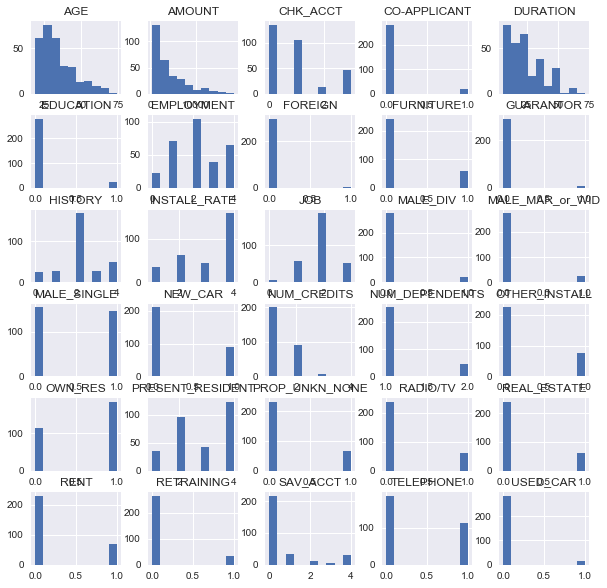

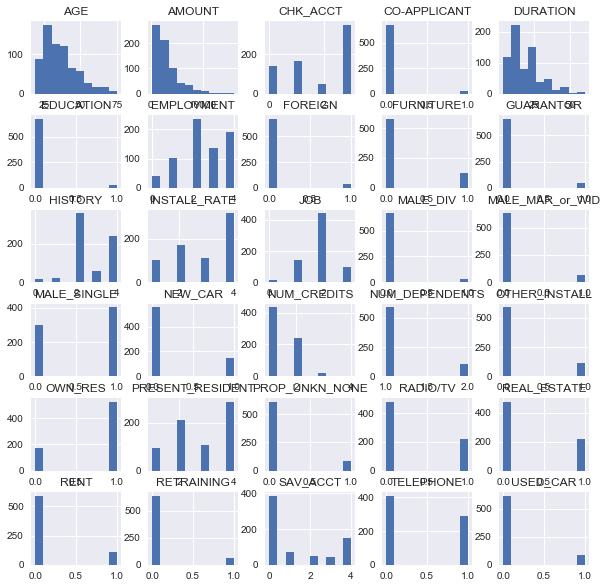

In [17]:
# Histogram with Groupby
df.groupby('RESPONSE').hist(figsize=(10,10))
# figure 1 is those who didn't pay, and figure 2 is those who paid back the loans

#  The characteristics of people who don't pay
- Most of theose around 25 years old
- have less credit amount,
- less than 200 DM checking acoount. 
- They are also have less duration day for the loans 
- recieve less education.
- Most of them are also nativesand femail, they don't have car. 
- And they are enplyeed under 5 years. 
- They have unpaid back in history.


# The characteristics of those who paid back
- Most of those who are singel male and around 30 years old. 
- They also have more than 200 DM Checking account. 
- Have more than 4 years employment.
- Have a managerial job, they are also natives. 
- they have more saving account and rent than the non paid borrowers.  
- Most of them ave residented more than 4 years.

# 8. The relationship between GUARANTOR AND EDUCATION

In [ ]:
!pip uninstall bokeh

DEPRECATION: Uninstalling a distutils installed project (bokeh) has been deprecated and will be removed in a future version. This is due to the fact that uninstalling a distutils project will only partially uninstall the project.
Uninstalling bokeh-0.12.5:
  /anaconda/lib/python2.7/site-packages/bokeh-0.12.5-py2.7.egg-info
Proceed (y/n)? 

In [ ]:
!pip install bokeh==0.12.7

In [ ]:
from bokeh.plotting import figure, output_file, show

# prepare some data
x = df['GUARANTOR']
y = df['EDUCATION']

# output to static HTML file
output_file("data/german.html")

# create a new plot with a title and axis labels
p = figure(title="simple line example", x_axis_label='x', y_axis_label='y')

# add a line renderer with legend and line thickness
p.circle(x, y, size=8)
p.xaxis.axis_label = 'GUARANTOR'
p.yaxis.axis_label = 'EDUCATION'

# show the results
show(p)

In [ ]:
p1 = figure(plot_width=600, plot_height=300, title="RESPONSE vs AMOUNT without jittering")

x = df['RESPONSE']
y = df['AMOUNT']

p1.circle(x=x, y=y)
    
# show the results
show(p1)

# 9. ADDITIONAL using of Plotly

In [ ]:
!pip install plotly

In [21]:
import plotly
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from plotly.graph_objs import *
init_notebook_mode()
# insert user name and API key
plotly.tools.set_credentials_file(username='Lynlin', api_key='EjmCpYoJKbZ2NkMPNURD')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [ ]:

labels = ['RESPONSE','NON_RESPONSE']
values = [700,300]

trace = go.Pie(labels=labels, values=values)

iplot([trace], filename='data/basic_pie_chart')

# 10. General recommendation

- Give credits to mid age people with more amount and have greater that 200 DM checking account and more in saving account.
- Who is mail and singel would be more possible to pay the loan
- who is resident for more than 3 years and history pay in time would has a good response
- Do not give the borrowers a long duration time.